<a href="https://colab.research.google.com/github/takiyama0617/colaboratory/blob/master/sample_sklearn_handwritten_numeral_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learnで機械学習手書き数字認識
アヤメのデータは、数値データでの学習だったが、今回は手書き数字の画像データを使用する

In [4]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.data)
print('次元 : ', digits.data.ndim)
print(digits.data.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
次元 :  2
(1797, 64)


In [5]:
print(digits.target)

[0 1 2 ... 8 9 8]


In [6]:
digits.images[2]

array([[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
       [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
       [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
       [ 0.,  0.,  1.,  6., 15., 11.,  0.,  0.],
       [ 0.,  1.,  8., 13., 15.,  1.,  0.,  0.],
       [ 0.,  9., 16., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  3., 13., 16., 16., 11.,  5.,  0.],
       [ 0.,  0.,  0.,  3., 11., 16.,  9.,  0.]])

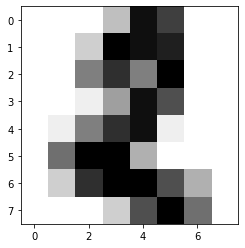

In [8]:
from sklearn import datasets
import matplotlib.pyplot as plt 

# ３番目の数字を表示
plt.imshow(digits.images[2], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

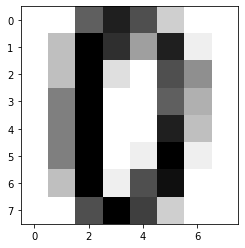

In [9]:
plt.imshow(digits.images[30], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

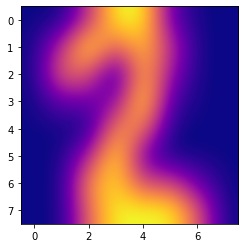

In [17]:
import random
plt.imshow(digits.images[random.choice(range(digits.data.shape[0]))], cmap='plasma', interpolation='bicubic')
plt.show()

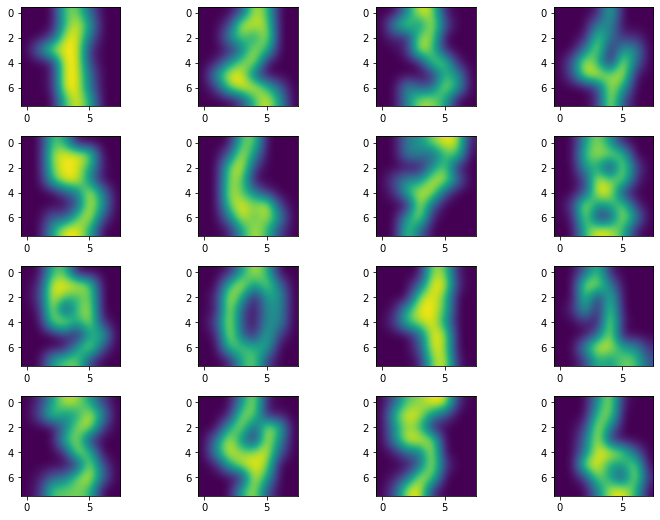

In [20]:
import numpy as np 

# 行
ROWS_COUNT = 4
# 列
COLUMNS_COUNT = 4
DIGIT_GRAPH_COUNT = ROWS_COUNT * COLUMNS_COUNT

subfig = []

# X軸データ
x = np.linspace(-1, 1, 10)

fig = plt.figure(figsize=(12, 9))
for i in range(1, DIGIT_GRAPH_COUNT + 1) :
  # 順序i番目のsubfigに追加
  subfig.append(fig.add_subplot(ROWS_COUNT, COLUMNS_COUNT, i))
  # y軸データ（n次元)
  y = x ** i 
  subfig[i - 1].imshow(digits.images[i], interpolation='bicubic', cmap='viridis')

fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

### 手書き数字データセットを３次元の空間で確認する

In [0]:
from sklearn.decomposition import PCA
import sklearn.datasets as datasets
from mpl_toolkits.mplot3d import Axes3D

digits = datasets.load_digits()
all_features = digits.data
teacher_labels = digits.target

In [0]:
def getcolor(color) :
  if color == 0:
    return 'red'
  elif color == 1:
    return 'orange'
  elif color == 2:
    return 'yellow'
  elif color == 3:
    return 'greenyellow'
  elif color == 4:
    return 'green'
  elif color == 5:
    return 'cyan'
  elif color == 6:
    return 'blue'
  elif color == 7:
    return 'navy'
  elif color == 8:
    return 'purple'
  else:
    return 'black'

* 特徴量が64個あるので、次元削除を行う
 * ３次元空間に描画するので、64個の特徴量から３つに次元削除を行う必要がある
* 次元削除は、PCA（主成分分析）を使う
 * PCAは、教師なしの機械学習で多次元の特徴量の「特徴」を失わない前提で、データの特徴量を圧縮できる


In [0]:
pca = PCA(n_components=3)
# 主成分分析により、６４次元のall_featuresを３次元に変換
three_featchers = pca.fit_transform(all_features)

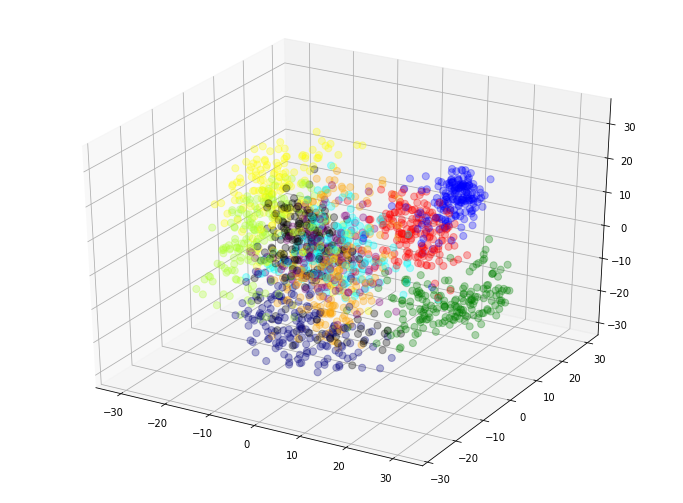

In [30]:
fig = plt.figure(figsize=(12, 9))
subfig = fig.add_subplot(111, projection='3d')
# 教師データに対応する色のリストを用意
colors = list(map(getcolor, teacher_labels))

subfig.scatter(three_featchers[:, 0], three_featchers[:, 1], three_featchers[:, 2], s=50, c=colors, alpha=0.3)
plt.show()